# Bank Marketing Project
**Abstract:** The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. 
    The classification goal is to predict if the client will subscribe a term deposit (variable y).

**Data Set Information:**

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were 
based on phone calls. Often, more than one contact to the same client was required, in order to access if the 
product (bank term deposit) would be ('yes') or not ('no') subscribed.
The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset3/main/bank_marketing.csv')

In [3]:
df.head() 
# all features looking categorical type except 'age',balance' & 'duration'

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [7]:
# shape of Dataset
df.shape

(11162, 17)

In [8]:
# Dataset description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [98]:
df.isnull().sum()
# Dataset is cleaned

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [4]:
df.describe() # Statistical summary

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


no     5873
yes    5289
Name: deposit, dtype: int64


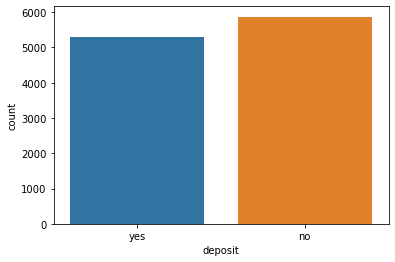

In [4]:
# target is balanced
print(df['deposit'].value_counts())
sns.countplot(df['deposit'])
plt.show()

In [4]:
# changed the 'deposit' feature into numeric form
df['deposit']= np.where(df['deposit']=='no',0,1)

**Let's do data visualization**

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64


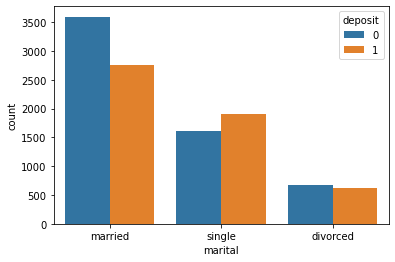

In [68]:
# checking 'marital' categorical value dsitribution with 'deposit'
print(df['marital'].value_counts())
sns.countplot(df['marital'], hue= df['deposit'])
plt.show()

no     5881
yes    5281
Name: housing, dtype: int64


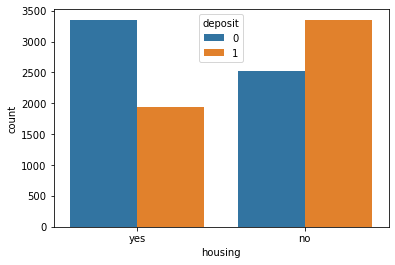

In [66]:
# plotting 'housing' feature distribution with deposit
print(df['housing'].value_counts())
sns.countplot(df['housing'], hue= df['deposit'])
plt.show()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64


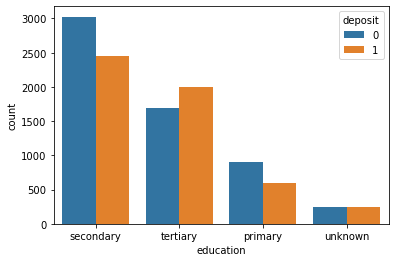

In [67]:
# plotting 'education' vs 'deposit'
print(df['education'].value_counts())
sns.countplot(df['education'], hue= df['deposit'])
plt.show()

no     9702
yes    1460
Name: loan, dtype: int64


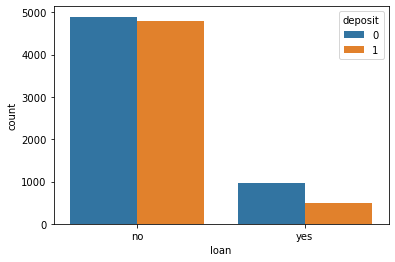

In [69]:
#
print(df['loan'].value_counts())
sns.countplot(df['loan'], hue= df['deposit'])
plt.show()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64


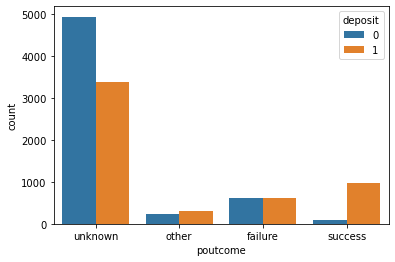

In [70]:
print(df['poutcome'].value_counts())
sns.countplot(df['poutcome'], hue= df['deposit'])
plt.show()

no     10994
yes      168
Name: default, dtype: int64


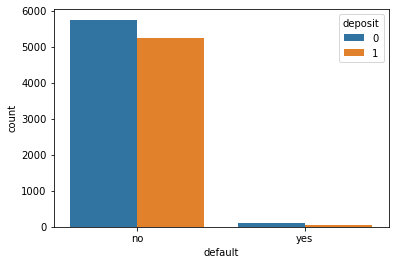

In [71]:
print(df['default'].value_counts())
sns.countplot(df['default'], hue= df['deposit'])
plt.show()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64


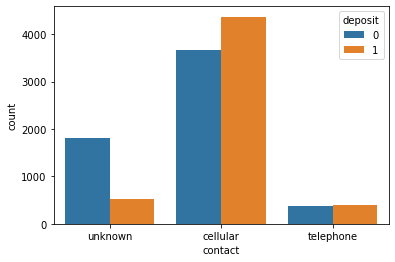

In [72]:
print(df['contact'].value_counts())
sns.countplot(df['contact'], hue= df['deposit'])
plt.show()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64


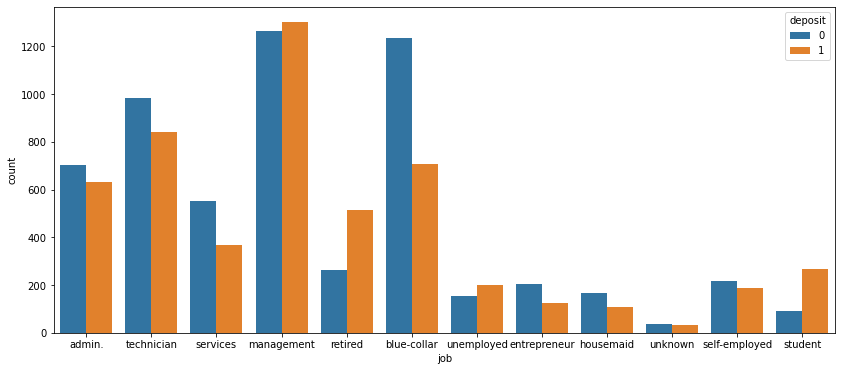

In [94]:
print(df['job'].value_counts())
plt.figure(figsize=(14,6))
sns.countplot(df['job'], hue= df['deposit'])
plt.show()
#
# customers who related to management,student,retired those maximum deposit raio is yes 

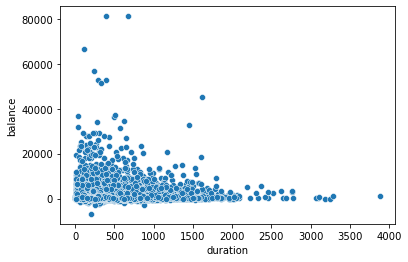

In [104]:
# Plotting scatterplot 'duration' vs 'balance'
sns.scatterplot(df['duration'], df['balance'])
plt.show()
# looking some outliers in this scatterplot

<AxesSubplot:xlabel='age', ylabel='balance'>

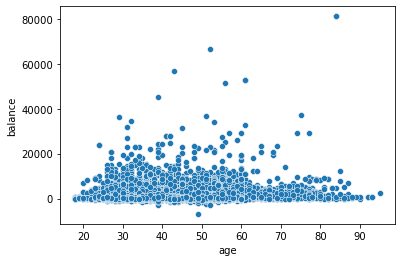

In [105]:
# plotting scatterplot 'age' vs 'balance'
sns.scatterplot(df['age'], df['balance'])

<Figure size 1584x1584 with 0 Axes>

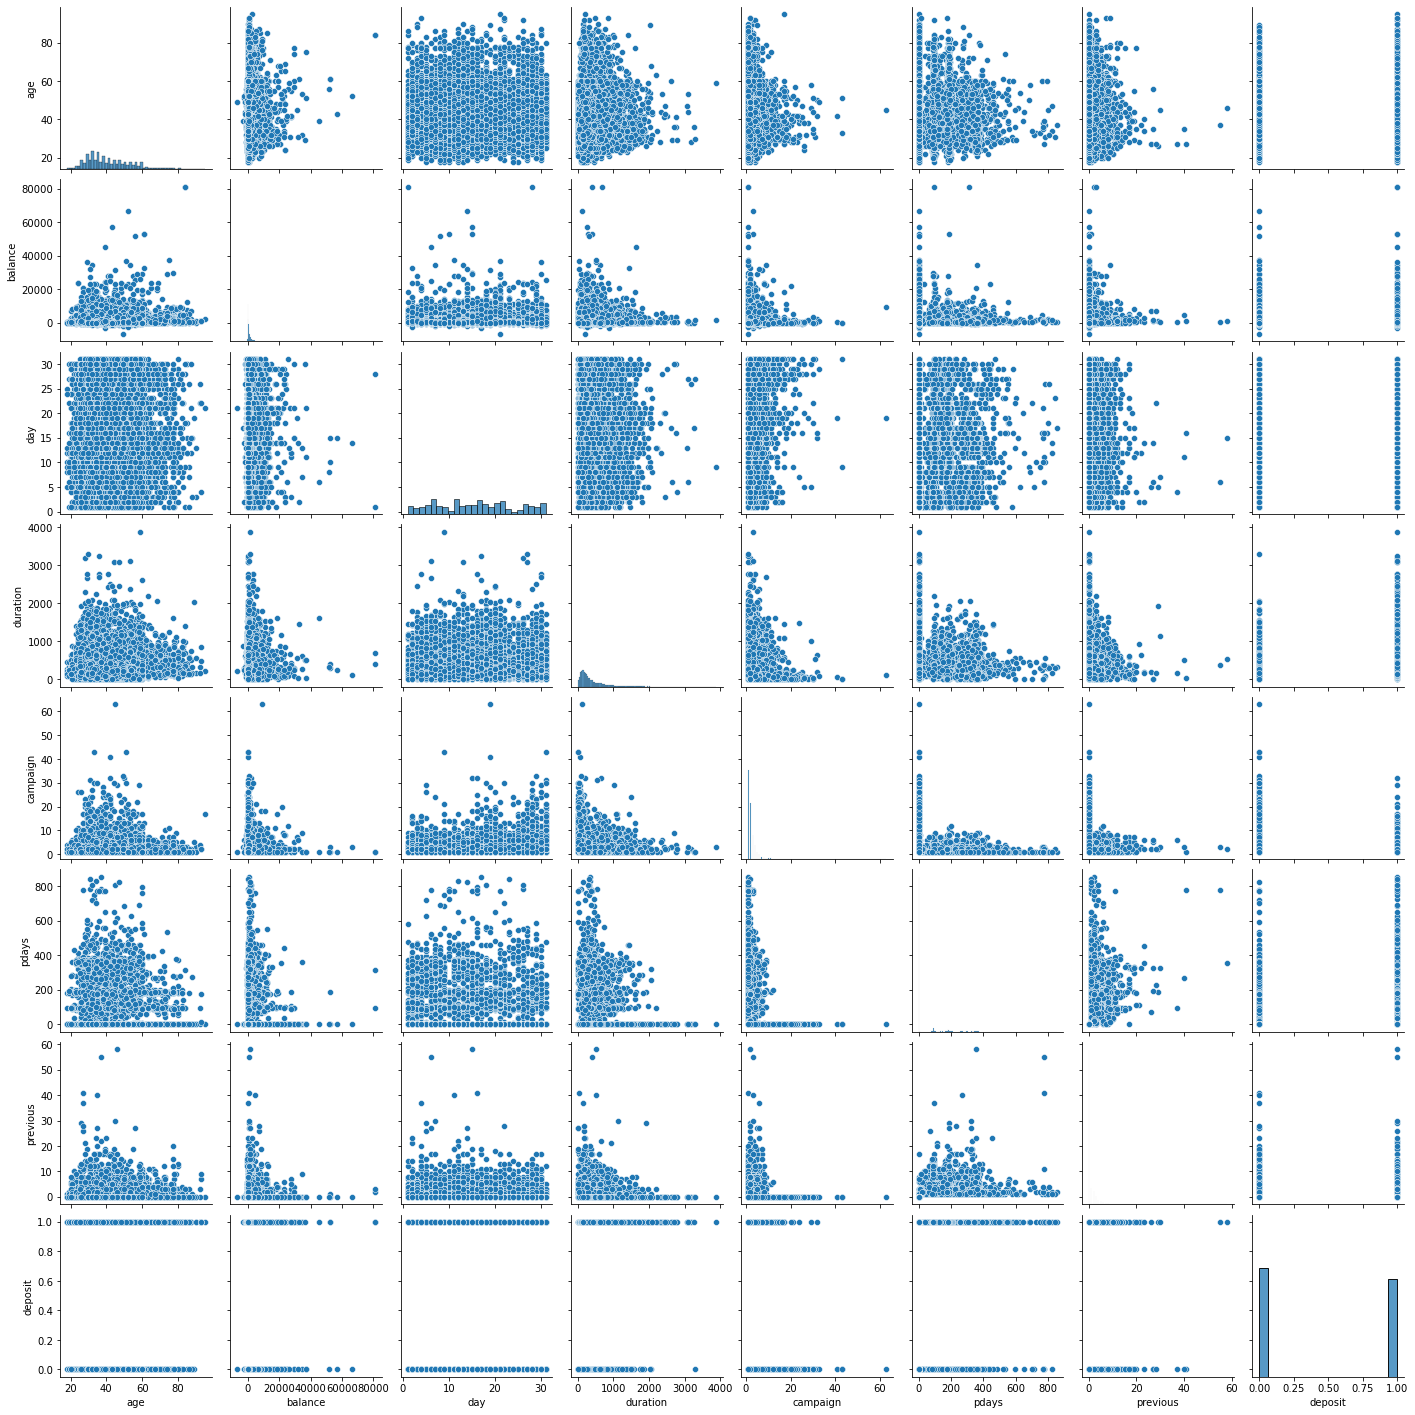

In [17]:
# plotting pairplot to see how each feature is related to each other
plt.figure(figsize=(22,22))
sns.pairplot(df)

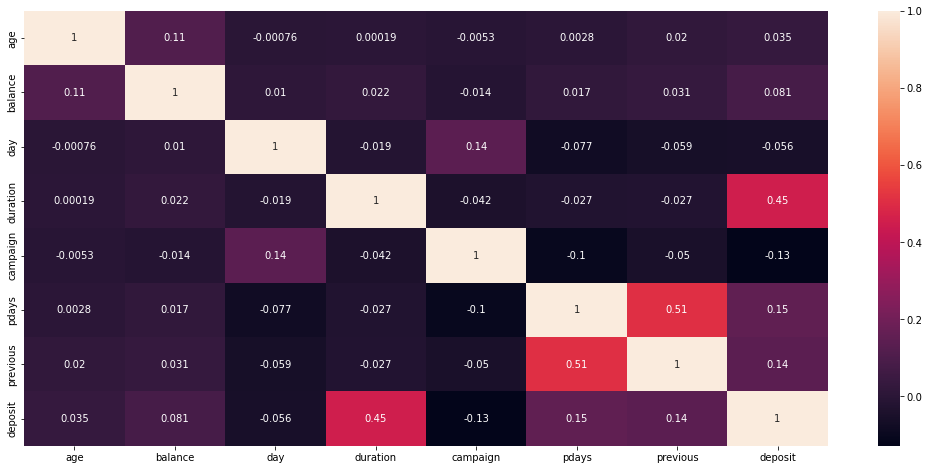

In [20]:
# plotting heatmap
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(), annot=True)
plt.show()
# no seen any correlation among the features in this dataset 

**Label-Encoding**

In [5]:
# from using one-hot-encoding we cant get good accuracy so we using Label-Encoding

# MAKING CATEGORICAL FEATURES VALUES INTO INTEGER FORM
df['marital'] = df['marital'].replace({'divorced':0,'single':2,'married':1})
df['housing'] = df['housing'].replace({'yes':0,'no':1})
df['loan']= df['loan'].replace({'no':1,'yes':0})
df['education']= df['education'].replace({'unknown':0, 'primary':1, 'secondary':2, 'tertiary':3})
df['default']= df['default'].replace({'no':1, 'yes':0})
df['poutcome']= df['poutcome'].replace({'failure':0, 'other':1, 'unknown':2, 'success':3})
df['contact']= df['contact'].replace({'unknown':0, 'telephone':1, 'cellular':2})
df['month']= df['month'].replace({'jan':1, 'feb':2, 'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,
                                  'nov':11,'dec':12})

# LABELEN-CODING
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['job']= le.fit_transform(df['job'])

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,2,1,2343,0,1,0,5,5,1042,1,-1,0,2,1
1,56,0,1,2,1,45,1,1,0,5,5,1467,1,-1,0,2,1
2,41,9,1,2,1,1270,0,1,0,5,5,1389,1,-1,0,2,1
3,55,7,1,2,1,2476,0,1,0,5,5,579,1,-1,0,2,1
4,54,0,1,3,1,184,1,1,0,5,5,673,2,-1,0,2,1


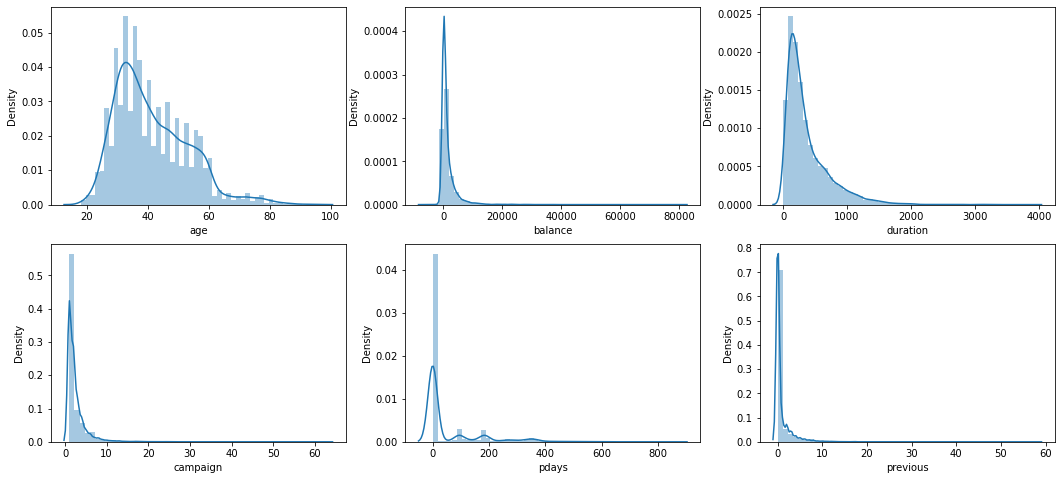

In [131]:
# plotting distribution plot of continuous feature

plt.figure(figsize=(18,8))
p=1
for col in df[['age','balance','duration','campaign','pdays','previous']]:
    if p <=6:
        ax = plt.subplot(2,3,p)
        sns.distplot(df[col])
        plt.xlabel=(col)
    p+=1    
plt.show() 

**LET'S CHECK OUTLIERS**

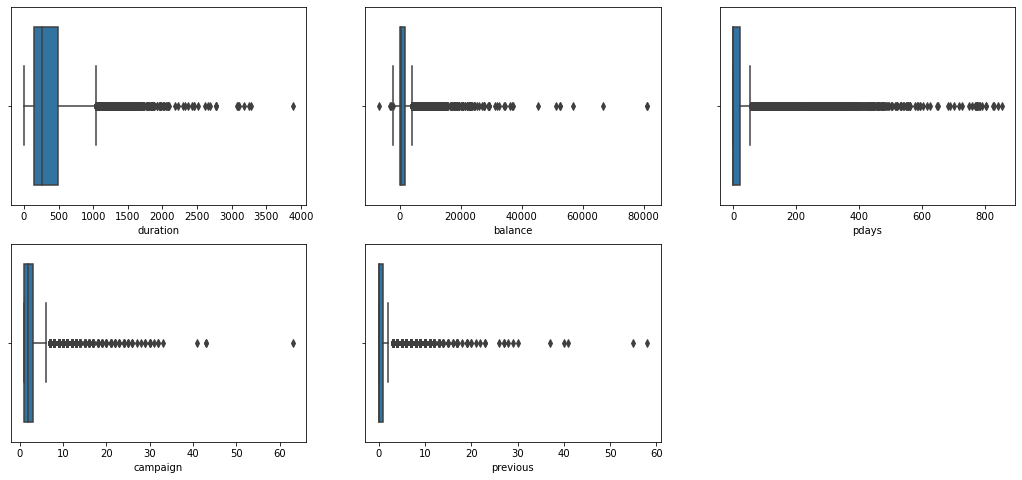

In [9]:
# plotting boxplot to check outliers
plt.figure(figsize=(18,8))
p= 1

for col in df[['duration','balance','pdays','campaign','previous']]:
    if p<=5:                                      
        ax=plt.subplot(2,3,p)                          
        sns.boxplot(df[col])
    p+=1
plt.show()
# THESE COLUMNS HAVE OUTLIERS

In [7]:
# SHUFFLE THE DATASET
df = df.sample(frac= 1.0, random_state=42, ignore_index=True)

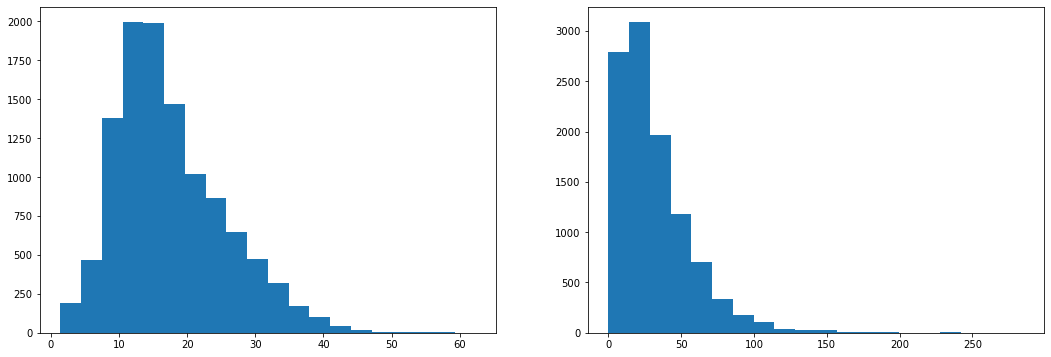

In [23]:
# Plotting distribution plot
fig,(ax1, ax2) = plt.subplots(1,2,figsize=(18,6))
ax1.hist(df['duration'], bins=20,)
ax2.hist(df['balance'], bins=20,)
plt.show()

**checking Outliers using z-score method and removed it**

In [8]:
from scipy.stats import zscore

z_scores=zscore(df[['balance', 'duration']])
df_new = df.loc[(abs(z_scores)<3).all(axis=1)]
print('original-shape=', df.shape)
print('new dataset-shape=', df_new.shape)

original-shape= (11162, 17)
new dataset-shape= (10792, 17)


**Feature selection method**

In [45]:
from  sklearn.feature_selection import SelectKBest, f_classif

best_feature= SelectKBest(score_func= f_classif, k=12)
fit=best_feature.fit(X,y)
df_scores=pd.DataFrame(fit.scores_)
col=pd.DataFrame(X.columns)
feature=pd.concat([col,df_scores],axis=1)
feature.columns=['features_name','score']
df1=feature.nlargest(12,'score')
df1

,features_name,score
11,duration,2864.172247
8,contact,743.025981
6,housing,484.045466
13,pdays,262.492195
14,previous,222.677159
12,campaign,186.129893
7,loan,138.153056
15,poutcome,77.987038
5,balance,73.940086
3,education,64.120982


In [9]:
#df_new = df_new.drop(['default','month','day'], axis=1)
X = df_new.iloc[:, :-1]
y = df_new['deposit']

**LET'S start a building  MODEL**

In [10]:
from sklearn.preprocessing import *
from sklearn.metrics import *
from sklearn.model_selection import *

In [11]:
# SCALING THE DATASET
sc = StandardScaler()
scaled = sc.fit_transform(X)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm  import SVC
from sklearn.ensemble import *

In [12]:
# SPLIT THE DATASET INTO TRAIN & TEST

x_train, x_test, y_train, y_test = train_test_split(scaled, y, test_size=0.2, random_state=43, stratify=y)

**LinearRegression**

In [14]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
pred = LR.predict(x_test)
print(f'accuracy_score : {accuracy_score(y_test, pred)} ')
print(f'precision_score : {precision_score(y_test, pred)} ')
print(f'recall_score : {recall_score(y_test, pred)} \n')
print(f'confusion_matrix :\n {confusion_matrix(y_test, pred)}')

accuracy_score : 0.7892542843909217 
precision_score : 0.7965367965367965 
recall_score : 0.7337986041874377 

confusion_matrix :
 [[968 188]
 [267 736]]


**SVM CLassifier**

In [16]:
svm = SVC(degree=4,C=2)
svm.fit(x_train, y_train)
pred = svm.predict(x_test)
print(f'accuracy_score : {accuracy_score(y_test, pred)} ')
print(f'precision_score : {precision_score(y_test, pred)} ')
print(f'recall_score : {recall_score(y_test, pred)} \n')
print(f'confusion_matrix :\n {confusion_matrix(y_test, pred)}')
print(F'classification_report: \n{classification_report(y_test, pred)}')

accuracy_score : 0.8276980083371931 
precision_score : 0.8048309178743961 
recall_score : 0.8305084745762712 

confusion_matrix :
 [[954 202]
 [170 833]]
classification_report: 
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1156
           1       0.80      0.83      0.82      1003

    accuracy                           0.83      2159
   macro avg       0.83      0.83      0.83      2159
weighted avg       0.83      0.83      0.83      2159



In [18]:
from sklearn.ensemble import GradientBoostingClassifier

gb_c = GradientBoostingClassifier()
gb_c.fit(x_train, y_train)
pred = gb_c.predict(x_test)
print(f'accuracy_score : {accuracy_score(y_test, pred)} ')
print(f'precision_score : {precision_score(y_test, pred)} ')
print(f'recall_score : {recall_score(y_test, pred)} \n')
print(f'confusion_matrix :\n {confusion_matrix(y_test, pred)}')
print(F'classification_report: \n{classification_report(y_test, pred)}')

accuracy_score : 0.8397406206577119 
precision_score : 0.8255698711595639 
recall_score : 0.8305084745762712 

confusion_matrix :
 [[980 176]
 [170 833]]
classification_report: 
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1156
           1       0.83      0.83      0.83      1003

    accuracy                           0.84      2159
   macro avg       0.84      0.84      0.84      2159
weighted avg       0.84      0.84      0.84      2159



**KNeighborsClassifier**

In [59]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
pred = ad_c.predict(x_test)
print(f'accuracy_score : {accuracy_score(y_test, pred)} ')
print(f'precision_score : {precision_score(y_test, pred)} ')
print(f'recall_score : {recall_score(y_test, pred)} \n')
print(f'confusion_matrix :\n {confusion_matrix(y_test, pred)}')
print(F'classification_report: \n{classification_report(y_test, pred)}')

accuracy_score : 0.8311688311688312 
precision_score : 0.8273921200750469 
recall_score : 0.8204651162790698 

confusion_matrix :
 [[974 184]
 [193 882]]
classification_report: 
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1158
           1       0.83      0.82      0.82      1075

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233



**RandomFOrest CLassifier**

In [60]:
rf_c = RandomForestClassifier()
rf_c.fit(x_train, y_train)
pred = rf_c.predict(x_test)
print(f'accuracy_score : {accuracy_score(y_test, pred)} ')
print(f'precision_score : {precision_score(y_test, pred)} ')
print(f'recall_score : {recall_score(y_test, pred)} \n')
print(f'confusion_matrix :\n {confusion_matrix(y_test, pred)}')
print(F'classification_report: \n{classification_report(y_test, pred)}')

accuracy_score : 0.8557993730407524 
precision_score : 0.8288209606986899 
recall_score : 0.8827906976744186 

confusion_matrix :
 [[962 196]
 [126 949]]
classification_report: 
              precision    recall  f1-score   support

           0       0.88      0.83      0.86      1158
           1       0.83      0.88      0.85      1075

    accuracy                           0.86      2233
   macro avg       0.86      0.86      0.86      2233
weighted avg       0.86      0.86      0.86      2233



**let's use cross-validation**

In [27]:
# CROSS-VALIDATION
kfold = KFold(n_splits=9)
print(f'LogsiticRegression score: {cross_val_score(LogisticRegression(), x_train,y_train,cv= kfold).mean()} \n')
print(f'SVC score: {cross_val_score(SVC(), x_train,y_train,cv= kfold).mean()} \n')

print(f'KNeighborsClassifier score: {cross_val_score(KNeighborsClassifier(), x_train,y_train,cv= kfold).mean()} \n')
print(f'RandomForestClassifier score: {cross_val_score(RandomForestClassifier(), x_train,y_train,cv= kfold).mean()} \n')

print(f'GradientBoostingClassifier score: {cross_val_score(gb_c, x_train,y_train,cv= kfold).mean()}')

# I got best cross-validation score with GradientBoosting & RandomForest

LogsiticRegression score: 0.8014605781485344 

SVC score: 0.8240466776735025 

KNeighborsClassifier score: 0.788717148457112 

RandomForestClassifier score: 0.8518470242922798 

GradientBoostingClassifier score: 0.8462879687560343


**Let's use Hyperparameter-tuning**

best parameter of this model:GradientBoostingClassifier(max_depth=7, n_estimators=380)

accuracy_score = 0.8397406206577119
classification_report                precision    recall  f1-score   support

           0       0.85      0.85      0.85      1156
           1       0.83      0.83      0.83      1003

    accuracy                           0.84      2159
   macro avg       0.84      0.84      0.84      2159
weighted avg       0.84      0.84      0.84      2159

confusion_matrix


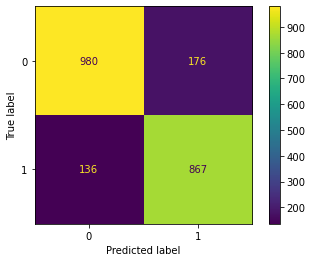

In [28]:
# HYPERTUNING WITH GRADIENTBOOSTING

from sklearn.model_selection import GridSearchCV
GB_C = GradientBoostingClassifier()
param= {'n_estimators':[100,180,380],'learning_rate':[0.1,0.01], 'max_depth':[3,5,7,9],'subsample':[0.5,0.7,1.0]}

Grid= GridSearchCV(GB_C, param, cv=kfold, n_jobs=-1)
Grid.fit(x_train,y_train)
print(f'best parameter of this model:{Grid.best_estimator_}\n')
gbc = Grid.best_estimator_
gbc.fit(x_train,y_train)
_pred= gbc.predict(x_test)  
print('accuracy_score =', accuracy_score(y_test, pred))
print('classification_report ', classification_report(y_test,pred))

# PLOT CONFUSION MATRIX
print('confusion_matrix')
cm= confusion_matrix(y_test, _pred, labels= gbc.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gbc.classes_)
disp.plot()  
plt.show()

best parameter of this model:RandomForestClassifier(max_depth=13, min_samples_split=3, n_estimators=380)

accuracy_score = 0.8494673459935155
classification_report                precision    recall  f1-score   support

           0       0.88      0.84      0.86      1156
           1       0.82      0.86      0.84      1003

    accuracy                           0.85      2159
   macro avg       0.85      0.85      0.85      2159
weighted avg       0.85      0.85      0.85      2159

confusion_matrix


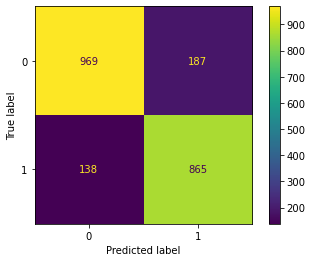

In [33]:
# HYPERTUNING WITH RABSDOMFOREST CLASSIFIER

RF_C = RandomForestClassifier()
param= {'n_estimators':[100,180,380], 'max_depth':[7,9,11,13],'min_samples_split':[2,3]}

Grid= GridSearchCV(RF_C, param, cv=kfold, n_jobs=-1)
Grid.fit(x_train,y_train)
print(f'best parameter of this model:{Grid.best_estimator_}\n')
rfc = Grid.best_estimator_
rfc.fit(x_train,y_train)
pred= rfc.predict(x_test)  
print('accuracy_score =', accuracy_score(y_test, pred))
print('classification_report ', classification_report(y_test,pred))

# PLOT CONFUSION MATRIX
print('confusion_matrix')
cm= confusion_matrix(y_test, pred, labels= rfc.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()  
plt.show()

* our goal is that build the model to predict more accurately that client  subscribed 'no'
* 0 = no subscribe,  1 = yes subscribe 

* Input-data has data-point distributed in such way, suppose if we use to skewness & outliers removing method on input-data
  to make like a normal-distribution. 
* ML algorithm performe well on that data-point but really this is not so useful as i supposed
* If we want to get good accuracy than must be more data & also input-data to be noraml distributed is important